
## Sign Language Image Classification using Deep Learning

In this project you will implement different deep learning networks to classify images of hands in poses that correspond to letters in American Sign Language. The dataset is contained in the assignment zip file, along with some images and a text file describing the dataset. It is similar in many ways to other MNIST datasets.

The American Sign Language letter database of hand gestures represent a multi-class problem with 24 classes of letters (**excluding J and Z which require motion**). The dataset format is patterned to match closely with the classic MNIST. Each training and test case represents a label (0-25) as a one-to-one map for each alphabetic letter A-Z (and **no cases for 9=J or 25=Z because of gesture motions**). The training data (27,455 cases) and test data (7172 cases) are approximately half the size of the standard MNIST but otherwise similar with a header row of label, $pixel_{1}$,$pixel_{2}$….$pixel_{784}$ which represent a single 28x28 pixel image with grayscale values between 0-255.

## Scenario

A client is interested in having you (or rather the company that you work for) investigate whether it is possible to develop an app that would enable American sign language to be translated for people that do not sign, or those that sign in different languages/styles. They have provided you with a labelled data of images related to signs (hand positions) that represent individual letters in order to do a preliminary test of feasibility.

Your manager has asked you to do this feasibility assessment, but subject to a constraint on the computational facilities available.  More specifically, you are asked to do **no more than 100 training runs in total** (including all models and hyperparameter settings that you consider).  

The task requires you to create a Jupyter Notebook to perform 22 steps. These steps involve loading the dataset, fixing data problems, converting labels to one-hot encoding, plotting sample images, creating, training, and evaluating two sequential models with 20 Dense layers with 100 neurons each, checking for better accuracy using MC Dropout, retraining the first model with performance scheduling, evaluating both models, using transfer learning to create a new model using pre-trained weights, freezing the weights of the pre-trained layers, adding new Dense layers, training and evaluating the new model, predicting and converting sign language to text using the best model.

### IMPORTANT
* Train all the models locally on your own machine. No model training should occur on Gradescope (GS).
* After completing the training, upload the trained models' **h5 files** and their training histories along with your notebook to GS.
    * best_dnn_bn_model.keras
    * best_dnn_bn_perf_model.keras
    * best_dnn_selu_model.keras
    * best_mobilenet_model.keras
    * history1
    * history2
    * history1_perf
    * historymb
* To avoid any confusion and poor training on GS, please remember to comment out the training code in your notebook before uploading it to GS.


In [ ]:
# import the necessary libraries (TensorFlow, sklearn NumPy, Pandas, Matplotlib and cv2) 
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

import numpy as np
import pandas as pd     
import matplotlib.pyplot as plt
import os

2.16.1
3.3.3


**Step0** This test is for checking whether all the required files are submitted. Once you submit all the required files to the autograder, you will be able to pass this step.

**IMPORTANT:** Run this step to determine whether you have created all the required files correctly.

_Points:_ 1

In [ ]:
# Don't change this cell code
required_files = ['best_dnn_bn_model.keras','best_dnn_bn_perf_model.keras','best_dnn_selu_model.keras','best_mobilenet_model.keras','history1','history2','history1_perf','historymb']
step0_files = True
for file in required_files:
    if os.path.exists(file) == False:
        step0_files = False
        print("One or more files are missing!")
        break

# The following code is used by the autograder. Do not modify it.   
step0_data = step0_files

One or more files are missing!


In [ ]:
grader.check("step00")

NameError: name 'grader' is not defined

### Data Preprocessing

**STEP1** Load the dataset (train and test) using `Pandas` from the CSV file.

_Points:_ 1

In [ ]:
# Load the train and test dataset and store them in train_df and test_df
import pandas as pd

train_df = pd.read_csv('sign_mnist_train.csv')

test_df = pd.read_csv('sign_mnist_test.csv')

# The following code is used by the autograder. Do not modify it.
step1_sol = test_df.shape

In [ ]:
grader.check("step01")

NameError: name 'grader' is not defined

**STEP2** Examine the data and fix any problems. Make sure it has 24 classes, starting from class 0. In addition, normalize the values of your images in a range of 0 and 1.

_Points:_ 1

In [ ]:
# Separate labels and pixel values in training and testing sets and assign it to train_labels and train_images
# re-import data as this step directly manipulates it
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

# ensuring only labels between 0 and 24 are used
train_df = train_df[(train_df['label'] >= 0) & (train_df['label'] <= 24)]
test_df = test_df[(test_df['label'] >= 0) & (test_df['label'] <= 24)]

# since J is not included, subtract 1 from labels from 9 upwards

train_df.loc[train_df['label'] >= 9, 'label'] -= 1
test_df.loc[test_df['label'] >= 9, 'label'] -= 1

train_labels = train_df['label'].values
train_images = train_df.drop(columns='label').values / 255.0

test_labels = test_df['label'].values
test_images = test_df.drop(columns='label').values / 255.0

print(max(train_labels))
# The following code is used by the autograder. Do not modify it.
step2_sol = {
    "max_label_train": max(train_labels),
    "min_label_train": min(train_labels),
    "max_pixel_value_train": max(train_images.ravel()),
    "min_pixel_value_train": min(train_images.ravel()),
    "max_label_test": max(test_labels),
    "min_label_test": min(test_labels),
    "max_pixel_value_test": max(test_images.ravel()),
    "min_pixel_value_test": min(test_images.ravel())
}

23


In [ ]:
grader.check("step02")

NameError: name 'grader' is not defined

**STEP3** Convert Labels to One-Hot Encoding both train and test.

_Points:_ 1

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
# Number of classes
num_classes = 24
train_labels_encoded = to_categorical(train_labels, num_classes=num_classes)
test_labels_encoded = to_categorical(test_labels, num_classes=num_classes)

# The following code is used by the autograder. Do not modify it.
step3_sol = {
    "train_labels_shape": train_labels_encoded.shape,
    "test_labels_shape": test_labels_encoded.shape,
    "sample_train_label": train_labels_encoded[0],
    "sample_test_label": test_labels_encoded[0]
}

In [ ]:
grader.check("step03")

NameError: name 'grader' is not defined

**STEP4** Plot one sample image for each letter in the dataset given in the training set. To solve this step you should use the function `imshow` to diplay your images in a similar to the image below.

<center><img src="example_letters.jpg" width=400 height=300/></center>





_Points:_ 0

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]


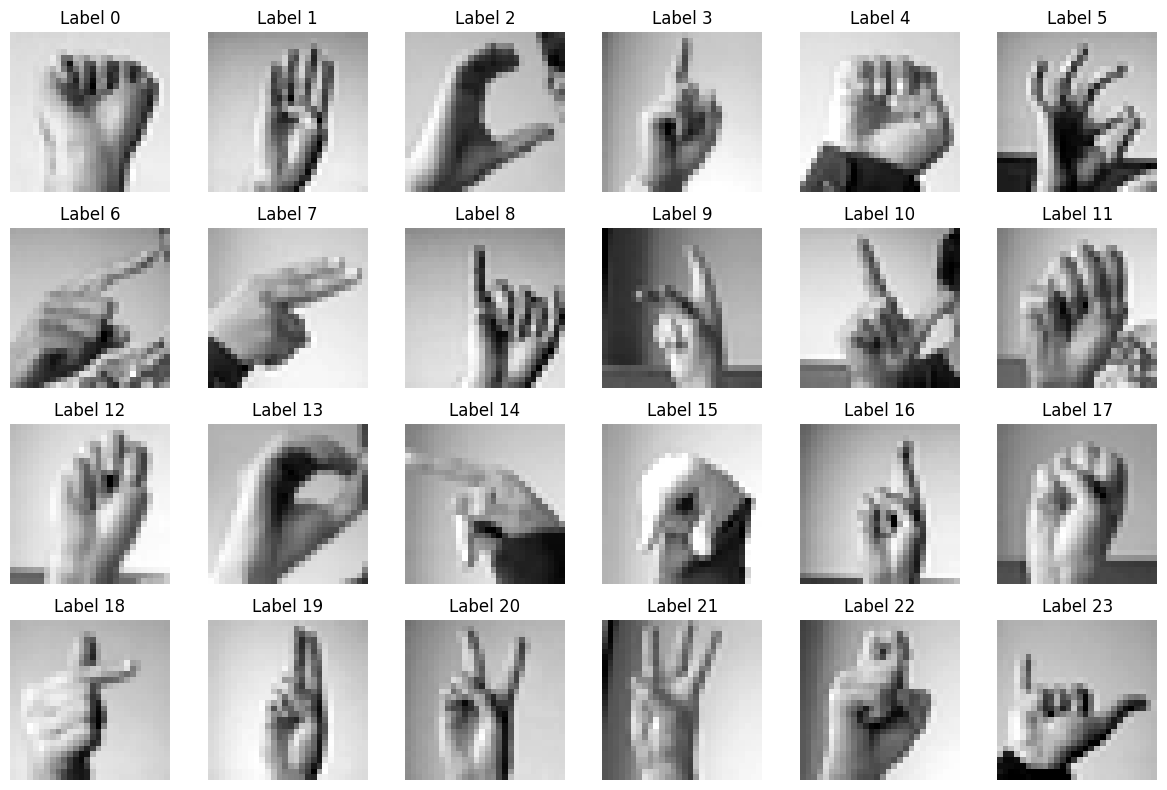

In [ ]:
# Get one sample image for each label
import matplotlib.pyplot as plt
sample_images = {}

for img, label in zip(train_images, train_labels):
    if label not in sample_images:
        sample_images[label] = img
    if len(sample_images) == 24:
        break

sorted_labels = sorted(sample_images.keys())
print(sorted_labels)

plt.figure(figsize=(12, 8))
for i, label in enumerate(sorted_labels):
    plt.subplot(4, 6, i + 1)
    plt.imshow(sample_images[label].reshape(28, 28), cmap='gray')
    plt.title(f"Label {label}")
    plt.axis('off')

plt.tight_layout()
plt.show()

# Plot the sample images

In [ ]:
grader.check("step04")

NameError: name 'grader' is not defined

## Create Neural Network Architectures

In this part you should create two different models (model1 and model2) with different architectures.

**STEP5** 
Create one sequential model in `TensorFlow` with 20 Dense layers with 100 neurons each one. Consider the specific modifications that you need to do in order to work with your specific input and those to get the required output. 

* This model uses Batch Normalization after each Dense layer and uses He initialization for all of them. Apply Swish activation following each Batch Normalization.
* The input layer should be able to accept data of shape (784,), which corresponds to the flattened image data. The output layer should produce 24 outputs to correspond to each class.


_Points:_ 5

In [ ]:
# import libraries like dense, BatchNormalization, swish, InputLayer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization, InputLayer
from tensorflow.keras.layers import Activation
from tensorflow.keras.activations import swish
from tensorflow.keras.initializers import HeNormal

# Model 1: with Batch Normalization
model1 = Sequential()

# Input layer
model1.add(InputLayer(shape=(784,)))

for _ in range(20):
    model1.add(Dense(100, kernel_initializer=HeNormal()))
    model1.add(BatchNormalization())
    model1.add(Activation('swish'))

# Output layer with 24 units, softmax activation for classification
model1.add(Dense(24, activation='softmax'))
    
# The following code is used by the autograder. Do not modify it.
step5_sol = {
    "total_layers": len(model1.layers),
    "output_activation": model1.layers[-1].activation.__name__,
    "first_layer_input_shape": model1.layers[0].input.shape,
    "last_layer_output_units": model1.layers[-1].units,
    "batch_norm_count": sum([1 for layer in model1.layers if isinstance(layer, BatchNormalization)]),
    "swish_activation_count": sum([1 for layer in model1.layers if hasattr(layer, 'activation') and layer.activation == swish]),
}

In [ ]:
grader.check("step05")

NameError: name 'grader' is not defined

**STEP6** 
Create a second sequential model in `TensorFlow` . This model should incorporate specific features to promote self-normalization and include regularization:

* Layers and Neurons: Construct the model with 20 Dense layers, each containing 100 neurons.
* Activation and Initialization:
  * Use SELU (Scaled Exponential Linear Unit) activation for each Dense layer to ensure self-normalization.
  * Initialize weights using the LeCun normal initializer in all Dense layers.
* Regularization:
  * Integrate Dropout with a rate of 0.1 after every second Dense layer starting from the second Dense layer to enhance model regularization without breaking self-normalization.
* Input and Output:
  * The input layer should accept flattened images with a dimension of 784 (28x28 images flattened).
  * The output layer should consist of 24 neurons with softmax activation to handle multi-class classification.

_Points:_ 5

In [ ]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras.initializers import lecun_normal

# Model 2: with SELU and self-normalization
model2 = Sequential()

# Input layer
model2.add(InputLayer(shape=(784,)))

for i in range(20):
    model2.add(Dense(100, kernel_initializer=lecun_normal(), activation='selu'))
    # Add Dropout with rate 0.1 after every 2nd Dense layer (2nd, 4th, 6th, ...)
    if (i + 1) % 2 == 0:
        model2.add(Dropout(0.1))

# Output layer with 24 units, softmax activation
model2.add(Dense(24, activation='softmax'))

# The following code is used by the autograder. Do not modify it.
step6_sol = {
    "total_layers": len(model2.layers),
    "dropout_count": sum([1 for layer in model2.layers if isinstance(layer, Dropout)]),
    "selu_count": sum([1 for layer in model2.layers if hasattr(layer, 'activation') and layer.activation.__name__ == 'selu']),
    "first_layer_config": model2.layers[0].get_config(),
    "output_layer_activation": model2.layers[-1].activation.__name__
}

In [ ]:
grader.check("step06")

NameError: name 'grader' is not defined

## Compile the Models

**STEP7** 
Compile the both previous models using **Nadam** optimization. Also:

* Set the loss function to categorical cross-entropy. 
* Set the metric to accuracy.

_Points:_ 2

In [ ]:
from tensorflow.keras.optimizers import Nadam

# Compile both models

# Compile model1
model1.compile(
    optimizer=Nadam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Compile model2
model2.compile(
    optimizer=Nadam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# The following code is used by the autograder. Do not modify it.
step7_sol = {
    "model1_config": {
        "optimizer": str(model1.optimizer.__class__.__name__),
        "loss": model1.loss        
    },
    "model2_config": {
        "optimizer": str(model2.optimizer.__class__.__name__),
        "loss": model2.loss,        
    }
}

In [ ]:
grader.check("step07")

NameError: name 'grader' is not defined

## Model Training

**STEP8** One of these models work preferably with data, which follow a normal distribution. Generate **train_images_scaled** and **test_images_scaled** using a `Sklearn` function that allow you to convert data to a normal distribution with mean 0 and variance equal 1 and store it in train_images_scaled and test_images_scaled

_Points:_ 2

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Fit on training data and transform both train and test images
train_images_scaled = scaler.fit_transform(train_images)
test_images_scaled = scaler.transform(test_images)


# The following code is used by the autograder. Do not modify it.
step8_sol = (np.mean(train_images_scaled),np.mean(test_images_scaled),np.std(train_images_scaled),np.std(test_images_scaled))

In [ ]:
grader.check("step08")

NameError: name 'grader' is not defined

**STEP9** Train the two models on the training dataset using early stopping. In order to save the results given by your training for your models, create checkpoints saving the best model in each case using the function `ModelCheckpoint`. Note that one of the models use the scaled data obtained in **STEP8**. Meanwhile, the other model does not. Figure out which is the proper input data for each model.

* Limit the number of epochs to 100. Set the batch size to or greater than 32.

**IMPORTANT:** Comment out the code to train/fit the two models. Keep the code given to save the models.

_Points:_ 3

In [ ]:
import pickle
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# The following line of code is used by the autograder. Do not modify it.
history1, history2 = None, None
 
# We go to set a seed to get the same results every run
np.random.seed(42)
tf.random.set_seed(42)

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# Define model checkpoint callback
model1_checkpoint_cb = ModelCheckpoint('best_dnn_bn_model.keras', save_best_only=True, monitor='val_loss')
model2_checkpoint_cb = ModelCheckpoint('best_dnn_selu_model.keras', save_best_only=True, monitor='val_loss')

#################################### Perform the training on your machine and then comment out the following section before uploading it to gradescope. 
# Make sure your best model is named as follows:
# Model1 filename = best_dnn_bn_model.keras
# Model2 filename = best_dnn_selu_model.keras

# Train model 1 (Comment this out before submission)
# history1 = model1.fit(train_images, train_labels_encoded,
#                       validation_split=0.2,
#                       epochs=100,
#                       batch_size=32,
#                       callbacks=[early_stopping, model1_checkpoint_cb])


# Train model 2 (Comment this out before submission)
history2 = model2.fit(train_images_scaled, train_labels_encoded,
                      validation_split=0.2,
                      epochs=100,
                      batch_size=32,
                      callbacks=[early_stopping, model2_checkpoint_cb])


# The following code will save your history - don't change it.
#if 'history1' in globals():  
#    with open('./history1', 'wb') as file_pi:
#        pickle.dump(history1.history, file_pi)
#if 'history2' in globals():  
#    with open('./history2', 'wb') as file_pi:
#        pickle.dump(history2.history, file_pi)
####################################

# The following code is used by the autograder. Do not modify it.
step9_sol = (model1_checkpoint_cb, model2_checkpoint_cb, early_stopping)

Epoch 1/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2475 - loss: 2.5119 - val_accuracy: 0.6365 - val_loss: 1.0191
Epoch 2/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6039 - loss: 1.1478 - val_accuracy: 0.6955 - val_loss: 0.8134
Epoch 3/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7326 - loss: 0.8012 - val_accuracy: 0.8814 - val_loss: 0.3652
Epoch 4/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8218 - loss: 0.5859 - val_accuracy: 0.8809 - val_loss: 0.3997
Epoch 5/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8479 - loss: 0.5132 - val_accuracy: 0.8924 - val_loss: 0.3475
Epoch 6/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8696 - loss: 0.4695 - val_accuracy: 0.9155 - val_loss: 0.2808
Epoch 7/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8790 - loss: 0.4321 - val_accuracy: 0.9255 - val_loss: 0.2449
Epoch 8/100
687/687 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8887 - loss: 0.4043 - val_accu

In [ ]:
grader.check("step09")

NameError: name 'grader' is not defined

**STEP10** After training, you must now evaluate the performance of the two previously saved models using the test datasets. Each model has different data requirements:
* Model 1 should be evaluated using the original test dataset.
* Model 2 should be evaluated using the scaled test dataset.
Load each model from their saved states, then perform the evaluation. To pass this step, both models must achieve a test accuracy greater than 50%.

_Points:_ 2

In [ ]:
# Do not change the following 4 lines of code.
# define the file name for the saved model
model1_name = "best_dnn_bn_model.keras"
# load the model
model1 = keras.models.load_model(model1_name)
# define the file name for the saved model
model2_name = "best_dnn_selu_model.keras"
# load the model
model2 = keras.models.load_model(model2_name)

# Evaluate the models on the test set

test_loss1, test_acc1 = model1.evaluate(test_images, test_labels_encoded, verbose=0)
test_loss2, test_acc2 = model2.evaluate(test_images_scaled, test_labels_encoded, verbose=0)

print(f"Model 1| Test accuracy: {test_acc1:.4f}, Test loss: {test_loss1:.4f}")
print(f"Model 2| Test accuracy: {test_acc2:.4f}, Test loss: {test_loss2:.4f}")
print((test_loss1, test_acc1, test_loss2, test_acc2, model1, model2))
# The following code is used by the autograder. Do not modify it.
step10_sol = (test_loss1, test_acc1, test_loss2, test_acc2, model1, model2)

Model 1| Test accuracy: 0.5835, Test loss: 2.0734
Model 2| Test accuracy: 0.7876, Test loss: 1.6830
(2.0734176635742188, 0.5835192203521729, 1.6830084323883057, 0.7876464128494263, <Sequential name=sequential, built=True>, <Sequential name=sequential_1, built=True>)


In [ ]:
grader.check("step10")

NameError: name 'grader' is not defined

**STEP11** From the loaded history of the two trained models, plot a graph of **accuracy** vs **number of epochs** for both training and validation. 

_Points:_ 0

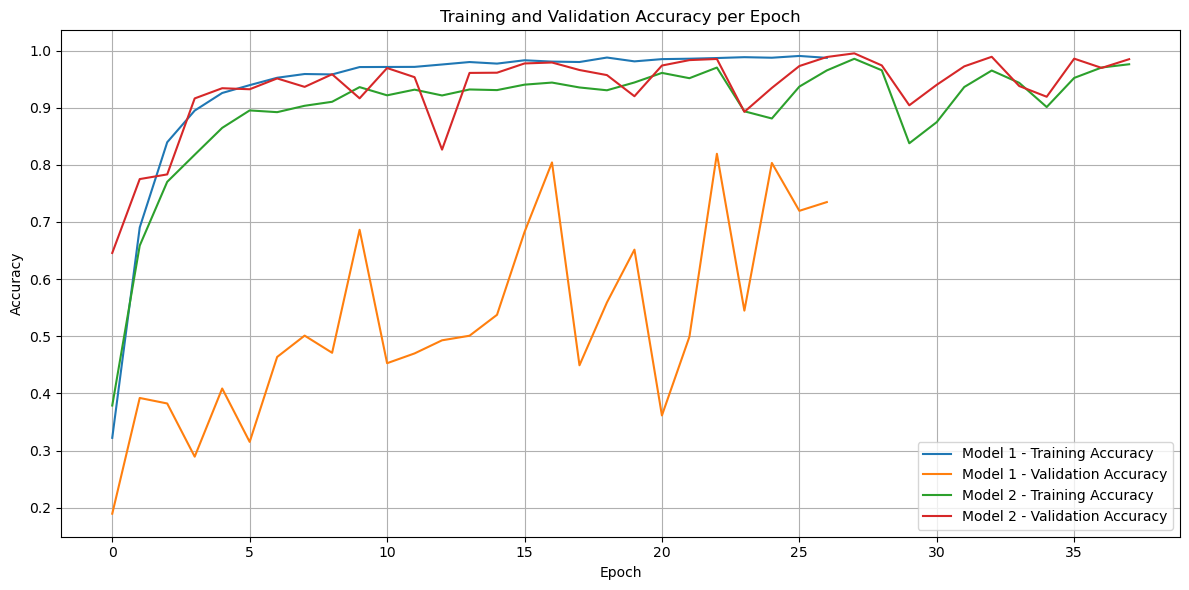

In [ ]:
# Load history for model 1 (Do not modify this code)
history_name1 = "./history1"
with open(history_name1, "rb") as file_pi:
    loaded_history1 = pickle.load(file_pi)
    
# Load history for model 2 (Do not modify this code)
history_name2 = "./history2"
with open(history_name2, "rb") as file_pi:
    loaded_history2 = pickle.load(file_pi)

# Plot the training and validation accuracies during training for both models
plt.figure(figsize=(12, 6))

# Model 1
plt.plot(loaded_history1['accuracy'], label='Model 1 - Training Accuracy')
plt.plot(loaded_history1['val_accuracy'], label='Model 1 - Validation Accuracy')

# Model 2
plt.plot(loaded_history2['accuracy'], label='Model 2 - Training Accuracy')
plt.plot(loaded_history2['val_accuracy'], label='Model 2 - Validation Accuracy')

# Plot configuration
plt.title("Training and Validation Accuracy per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# The following code is used by the autograder. Do not modify it.
step11_sol = (loaded_history1, loaded_history2)

In [ ]:
grader.check("step11")

NameError: name 'grader' is not defined

## MC Dropout

**STEP12** Check if model2 achieves better accuracy using MC Dropout (without retraining).

_Points:_ 3

In [ ]:
#This function computes the MC (Monte Carlo) Dropout predictions for a given model and input data. 
# It returns the mean of multiple predictions obtained by running the model in training mode.
#Parameters
#   model: A trained model with a dropout layers.
#   X    : The input data for which the predictions are to be made.
#   n_samples: The number of Monte Carlo samples to generate..
#Returns
  # The function returns an array-like object containing the MC Dropout predictions for the given input data. 
  # The shape of the output should be the same as the model's output layer.
def mc_dropout_predict(model, X, n_samples=20):
    # Write your code here
    predictions = []

    for _ in range(n_samples):
        # Enable dropout by setting training=True
        preds = model(X, training=True).numpy()  # shape: (num_samples, num_classes)
        predictions.append(preds)

    # Stack all predictions: shape (n_samples, num_samples, num_classes)
    predictions = np.stack(predictions, axis=0)

    # Average across MC samples: shape (num_samples, num_classes)
    output_mc = np.mean(predictions, axis=0)
    
    return output_mc

# call mc_dropout_predict to Compute the MC Dropout predictions for model 2
output_mc = mc_dropout_predict(model2, test_images_scaled, n_samples=20)

# Compute the accuracy using MC Dropout
predicted_labels_mc = np.argmax(output_mc, axis=1)
true_labels_mc = np.argmax(test_labels_encoded, axis=1)

accuracy_mc = np.mean(predicted_labels_mc == true_labels_mc)

# Display result.
print(f"Model 2 with MC Dropout: Test accuracy: {accuracy_mc:.4f}")

# The following code is used by the autograder. Do not modify it.
step12_sol = (output_mc, accuracy_mc)

Model 2 with MC Dropout: Test accuracy: 0.7893


In [ ]:
grader.check("step12")

NameError: name 'grader' is not defined

## Learning Rate (LR) scheduling

**STEP13** Retrain model1 using performance scheduling and see if it improves training speed and model accuracy.

**IMPORTANT:** Define the model the same way model1 was defined and compile the model the same way as model1.

_Points:_ 2

In [ ]:
# import ReduceLROnPlateau
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Do not modify the following line of code.
history1_perf = None

# Redefine Model 1 
model1_perfLRS = Sequential()
model1_perfLRS.add(InputLayer(shape=(784,)))
for _ in range(20):
    model1_perfLRS.add(Dense(100, kernel_initializer=HeNormal()))
    model1_perfLRS.add(BatchNormalization())
    model1_perfLRS.add(Activation(swish))
model1_perfLRS.add(Dense(24, activation='softmax'))

early_stopping_cb = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)
# Compile the model with Nadam optimizer and categorical cross-entropy loss
model1_perfLRS.compile(
    optimizer=Nadam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


lr_scheduler = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=1e-6
)

# Creating model checkpoint to save the best model. 
dnn_bn_perf_checkpoint_cb = ModelCheckpoint(
    "best_dnn_bn_perf_model.keras",
    save_best_only=True,
    monitor='val_accuracy',
    mode='max',
    verbose=1
)
#####Perform the training on your machine and then comment out the following section before uploading it to gradescope.
####################################  
# Make sure your best model is named as follows:
# Model1 with performance scheduling filename = best_dnn_bn_perf_model.keras


# Train the model using early stopping and exponential scheduling (Comment this out before submission)
#history1_perf = model1_perfLRS.fit(
#     train_images,
#     train_labels_encoded,
#     epochs=100,
#     batch_size=128,
#     validation_split=0.2,
#     callbacks=[early_stopping_cb, lr_scheduler, dnn_bn_perf_checkpoint_cb],
#     verbose=2
# )

# The following code will save your history - don't change it - comment it out before uploading to GS
#if "history1_perf" in globals():
#    with open('./history1_perf', 'wb') as file_pi:
#        pickle.dump(history1_perf.history, file_pi)
####################################
# The following code is used by the autograder. Do not modify it.
step13_sol = (dnn_bn_perf_checkpoint_cb, lr_scheduler)

Epoch 1/100

Epoch 1: val_accuracy improved from -inf to 0.20616, saving model to best_dnn_bn_perf_model.keras
172/172 - 7s - 43ms/step - accuracy: 0.2068 - loss: 2.6634 - val_accuracy: 0.2062 - val_loss: 2.5393 - learning_rate: 0.0010
Epoch 2/100

Epoch 2: val_accuracy improved from 0.20616 to 0.31197, saving model to best_dnn_bn_perf_model.keras
172/172 - 2s - 9ms/step - accuracy: 0.7208 - loss: 0.8692 - val_accuracy: 0.3120 - val_loss: 2.7183 - learning_rate: 0.0010
Epoch 3/100

Epoch 3: val_accuracy improved from 0.31197 to 0.46786, saving model to best_dnn_bn_perf_model.keras
172/172 - 2s - 9ms/step - accuracy: 0.9238 - loss: 0.2558 - val_accuracy: 0.4679 - val_loss: 2.5152 - learning_rate: 0.0010
Epoch 4/100

Epoch 4: val_accuracy did not improve from 0.46786
172/172 - 1s - 9ms/step - accuracy: 0.9613 - loss: 0.1286 - val_accuracy: 0.3462 - val_loss: 3.3868 - learning_rate: 0.0010
Epoch 5/100

Epoch 5: val_accuracy improved from 0.46786 to 0.51375, saving model to best_dnn_bn_per

Epoch 38/100

Epoch 38: val_accuracy did not improve from 1.00000
172/172 - 1s - 8ms/step - accuracy: 1.0000 - loss: 2.4371e-04 - val_accuracy: 1.0000 - val_loss: 7.9031e-05 - learning_rate: 7.8125e-06
Epoch 39/100

Epoch 39: ReduceLROnPlateau reducing learning rate to 3.906250185536919e-06.

Epoch 39: val_accuracy did not improve from 1.00000
172/172 - 1s - 8ms/step - accuracy: 1.0000 - loss: 2.4238e-04 - val_accuracy: 1.0000 - val_loss: 7.8567e-05 - learning_rate: 7.8125e-06
Epoch 40/100

Epoch 40: val_accuracy did not improve from 1.00000
172/172 - 1s - 8ms/step - accuracy: 1.0000 - loss: 2.4120e-04 - val_accuracy: 1.0000 - val_loss: 7.8273e-05 - learning_rate: 3.9063e-06
Epoch 41/100

Epoch 41: val_accuracy did not improve from 1.00000
172/172 - 1s - 8ms/step - accuracy: 1.0000 - loss: 2.4043e-04 - val_accuracy: 1.0000 - val_loss: 7.7998e-05 - learning_rate: 3.9063e-06
Epoch 42/100

Epoch 42: ReduceLROnPlateau reducing learning rate to 1.9531250927684596e-06.

Epoch 42: val_accurac

Epoch 78/100

Epoch 78: val_accuracy did not improve from 1.00000
172/172 - 1s - 8ms/step - accuracy: 1.0000 - loss: 2.0444e-04 - val_accuracy: 1.0000 - val_loss: 6.5957e-05 - learning_rate: 1.0000e-06
Epoch 79/100

Epoch 79: val_accuracy did not improve from 1.00000
172/172 - 1s - 8ms/step - accuracy: 1.0000 - loss: 2.0256e-04 - val_accuracy: 1.0000 - val_loss: 6.5352e-05 - learning_rate: 1.0000e-06
Epoch 80/100

Epoch 80: val_accuracy did not improve from 1.00000
172/172 - 1s - 8ms/step - accuracy: 1.0000 - loss: 2.0065e-04 - val_accuracy: 1.0000 - val_loss: 6.4738e-05 - learning_rate: 1.0000e-06
Epoch 81/100

Epoch 81: val_accuracy did not improve from 1.00000
172/172 - 1s - 8ms/step - accuracy: 1.0000 - loss: 1.9871e-04 - val_accuracy: 1.0000 - val_loss: 6.4116e-05 - learning_rate: 1.0000e-06
Epoch 82/100

Epoch 82: val_accuracy did not improve from 1.00000
172/172 - 1s - 8ms/step - accuracy: 1.0000 - loss: 1.9674e-04 - val_accuracy: 1.0000 - val_loss: 6.3490e-05 - learning_rate: 1

In [ ]:
grader.check("step13")

NameError: name 'grader' is not defined

**STEP14** Using the loaded model obtained from the code given below, evaluate the performance of the model on the test set.

_Points:_ 1

In [ ]:
# Do not change the following 2 lines of code.
# define the file name for the saved model
model_name = "best_dnn_bn_perf_model.keras"
# load the model
model1_perf = keras.models.load_model(model_name)

# Evaluate the model on the test set and find loss and accuracy
test_loss1_perf, test_acc1_perf = model1_perf.evaluate(test_images, test_labels_encoded, verbose=0)

# The following code is used by the autograder. Do not modify it.
step14_sol = (test_loss1_perf, test_acc1_perf)

In [ ]:
grader.check("step14")

NameError: name 'grader' is not defined

<!-- BEGIN QUESTION -->

**STEP15** From the history of the models loaded using the code given below, plot a graph of **accuracy** vs **number of epochs** for both training and validation.

_Points:_ 0

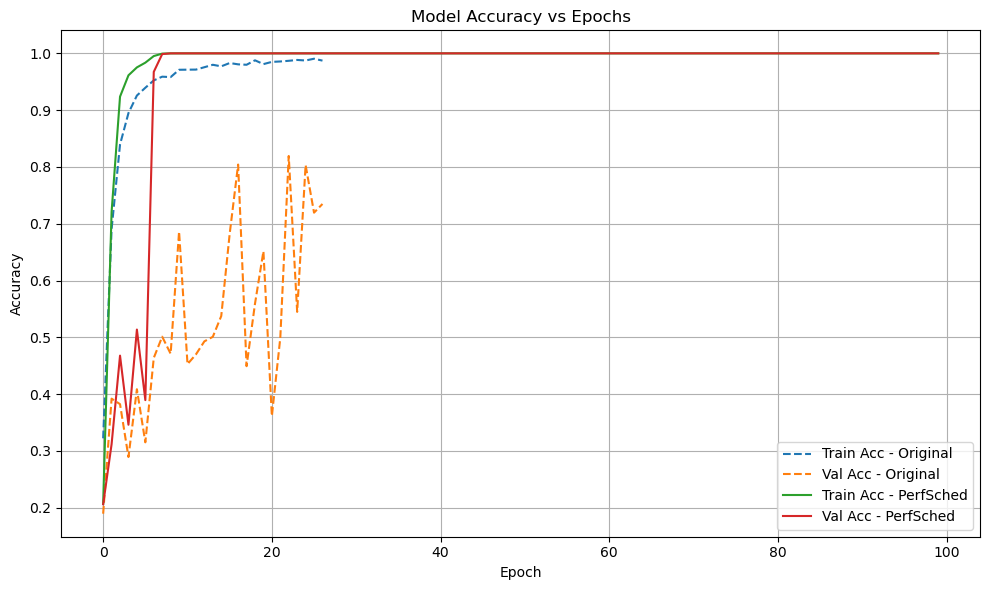

In [ ]:
# load history for model 1 with learning rate scheduling (do not modify the following code)
history_name1_perf = "./history1_perf"
with open(history_name1_perf, "rb") as file_pi:
    loaded_history1_perf = pickle.load(file_pi)

# Load history for the original model1 (do not modify the following code)
history_name1 = "./history1"
with open(history_name1, "rb") as file_pi:
    loaded_history1 = pickle.load(file_pi)

# Plot the training and validation accuracy for both models

# Plot accuracy for both training and validation
plt.figure(figsize=(10, 6))

# Original model1
plt.plot(loaded_history1['accuracy'], label='Train Acc - Original', linestyle='--')
plt.plot(loaded_history1['val_accuracy'], label='Val Acc - Original', linestyle='--')

# Performance-scheduled model1
plt.plot(loaded_history1_perf['accuracy'], label='Train Acc - PerfSched', linestyle='-')
plt.plot(loaded_history1_perf['val_accuracy'], label='Val Acc - PerfSched', linestyle='-')

# Labels and formatting
plt.title('Model Accuracy vs Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



In [ ]:
grader.check("step15")

NameError: name 'grader' is not defined

<!-- END QUESTION -->

## Transfer learning

Use transfer learning by using a pre-trained **MobileNetV3Small** model on imagenet dataset, and fine-tuning it on the Sign Language MNIST dataset.

**STEP16** First of all, you to prepare your data for this model.
* Reshape your input data (train and test) to (28, 28, 3).
* Standardize your input. 

_Points:_ 2

In [ ]:
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input
train_images_28x28 = train_images.reshape(-1, 28, 28)
test_images_28x28 = test_images.reshape(-1, 28, 28)

train_images_mb = np.stack([train_images_28x28, train_images_28x28, train_images_28x28], axis=-1)
test_images_mb = np.stack([test_images_28x28, test_images_28x28, test_images_28x28], axis=-1)

train_images_mb = train_images_mb.astype('float32')
test_images_mb = test_images_mb.astype('float32')

train_images_mb = preprocess_input(train_images_mb)
test_images_mb = preprocess_input(test_images_mb)

# The following code is used by the autograder. Do not modify it.
step16_sol = (train_images_mb,test_images_mb)

In [ ]:
grader.check("step16")

NameError: name 'grader' is not defined

**Step17** Now, we need to define and set up the model. For this you need to follow the next steps:

* Load the pre-trained **MobileNetV3Small** model with weights from ImageNet.
* Modify the model to accept inputs of shape (56, 56, 3). 
* Freeze the weights of the pretrained layers.* 
* Add input layer that take an image of shape (28,28,3), then a layer `UpSampling2D` to upscale the input by a factor of 2 so they can go through the network.

Consider that maybe you need to adapt the default output.

_Points:_ 2

In [ ]:
from tensorflow.keras.layers import Input, UpSampling2D, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# import MobileNetV3Small 
from tensorflow.keras.applications import MobileNetV3Small

# Load the pre-trained MobileNet model with weights from ImageNet
base_mb_model = MobileNetV3Small(
    input_shape=(56, 56, 3),
    include_top=False,  # exclude classifier head
    weights='imagenet'
)
# Create the new model

base_mb_model.trainable = False

input_layer = Input(shape=(28, 28, 3))
x = UpSampling2D(size=(2, 2))(input_layer) 
x = base_mb_model(x)
x = GlobalAveragePooling2D()(x)
output_layer = Dense(24, activation='softmax')(x) 

final_mb_model = Model(inputs=input_layer, outputs=output_layer)
final_mb_model.build(input_shape=(None, 28, 28, 3))

# The following code is used by the autograder. Do not modify it.
step17_sol = final_mb_model

In [ ]:
grader.check("step17")

NameError: name 'grader' is not defined

**Step18** Once we define the model and do the specific modifications to adjust to our data, we compile it.

* Use a learning rate schedule that uses an exponential decay schedule.
* Compile and train the model.

_Points:_ 2

In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from tensorflow.keras.losses import CategoricalCrossentropy
# Define an initial learning rate                            
initial_learning_rate = 0.01

# Create the proper learning rate schedule
lr_schedule = ExponentialDecay(
    initial_learning_rate=initial_learning_rate,
    decay_steps=100000,
    decay_rate=0.9,
    staircase=True
)


# Compile model
final_mb_model.compile(
    optimizer=Nadam(learning_rate=lr_schedule),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# The following code is used by the autograder. Do not modify it.
step18_sol = (lr_schedule, final_mb_model)

In [ ]:
grader.check("step18")

NameError: name 'grader' is not defined

**Step19** Train the mobilenet model. Include early stopping in your training procedure.

_Points:_ 2

In [ ]:
# import ModelCheckpoint
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
# Do not modify the following line of code.
history_mb = None
# Define model checkpoint callback (Do not modify this code).
best_model_checkpoint = ModelCheckpoint(
    "best_mobilenet_model.keras",  # required filename
    save_best_only=True,
    monitor="val_accuracy",
    mode="max",
    verbose=1
)


# Set up early stopping
early_stopping_cb = EarlyStopping(
    monitor="val_accuracy",
    patience=1000,
    restore_best_weights=True,
    verbose=1
)

## Perform the training on your machine and then comment out the following section before uploading it to gradescope. 
#################################### 
# make sure your best model is named as follow:
# MobileNet model filename = best_mobilenet_model.keras
# Train the model (comment this section out)

#history_mb = final_mb_model.fit(
#    train_images_mb,
#     train_labels_encoded,
#     epochs=100,
#     batch_size=64,
#     validation_data=(test_images_mb, test_labels_encoded),
#     callbacks=[best_model_checkpoint, early_stopping_cb]
# )

# The following code will save your history - don't change it
#if "history_mb" in globals():
#    with open('./historymb', 'wb') as file_pi:
#        pickle.dump(history_mb.history, file_pi)    
#####################################

# The following code is used by the autograder. Do not modify it.
step19_sol = (best_model_checkpoint, early_stopping_cb)

Epoch 1/100
427/429 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8204 - loss: 0.6331
Epoch 1: val_accuracy improved from -inf to 0.74735, saving model to best_mobilenet_model.keras
429/429 ━━━━━━━━━━━━━━━━━━━━ 10s 24ms/step - accuracy: 0.8204 - loss: 0.6331 - val_accuracy: 0.7474 - val_loss: 0.8239
Epoch 2/100
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8212 - loss: 0.6339
Epoch 2: val_accuracy improved from 0.74735 to 0.74777, saving model to best_mobilenet_model.keras
429/429 ━━━━━━━━━━━━━━━━━━━━ 16s 37ms/step - accuracy: 0.8212 - loss: 0.6339 - val_accuracy: 0.7478 - val_loss: 0.8235
Epoch 3/100
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.8213 - loss: 0.6334
Epoch 3: val_accuracy did not improve from 0.74777
429/429 ━━━━━━━━━━━━━━━━━━━━ 15s 34ms/step - accuracy: 0.8213 - loss: 0.6334 - val_accuracy: 0.7478 - val_loss: 0.8230
Epoch 4/100
428/429 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8214 - loss: 0.6330
Epoch 4: val_accuracy improved from 0.74777 t

Epoch 24/100
427/429 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8243 - loss: 0.6240
Epoch 24: val_accuracy improved from 0.75098 to 0.75112, saving model to best_mobilenet_model.keras
429/429 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8243 - loss: 0.6240 - val_accuracy: 0.7511 - val_loss: 0.8142
Epoch 25/100
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8244 - loss: 0.6236
Epoch 25: val_accuracy improved from 0.75112 to 0.75139, saving model to best_mobilenet_model.keras
429/429 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8244 - loss: 0.6236 - val_accuracy: 0.7514 - val_loss: 0.8138
Epoch 26/100
428/429 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.8246 - loss: 0.6231
Epoch 26: val_accuracy improved from 0.75139 to 0.75153, saving model to best_mobilenet_model.keras
429/429 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8246 - loss: 0.6231 - val_accuracy: 0.7515 - val_loss: 0.8134
Epoch 27/100
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8247 - 

427/429 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8281 - loss: 0.6141
Epoch 47: val_accuracy improved from 0.75349 to 0.75363, saving model to best_mobilenet_model.keras
429/429 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.8281 - loss: 0.6141 - val_accuracy: 0.7536 - val_loss: 0.8050
Epoch 48/100
427/429 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8281 - loss: 0.6137
Epoch 48: val_accuracy did not improve from 0.75363
429/429 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8281 - loss: 0.6137 - val_accuracy: 0.7536 - val_loss: 0.8046
Epoch 49/100
428/429 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8282 - loss: 0.6132
Epoch 49: val_accuracy did not improve from 0.75363
429/429 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step - accuracy: 0.8282 - loss: 0.6132 - val_accuracy: 0.7536 - val_loss: 0.8042
Epoch 50/100
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8282 - loss: 0.6128
Epoch 50: val_accuracy did not improve from 0.75363
429/429 ━━━━━━━━━━━━━━━━━━━━ 10s 23ms/step -

428/429 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8309 - loss: 0.6046
Epoch 70: val_accuracy did not improve from 0.75600
429/429 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8309 - loss: 0.6046 - val_accuracy: 0.7560 - val_loss: 0.7962
Epoch 71/100
428/429 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8310 - loss: 0.6042
Epoch 71: val_accuracy improved from 0.75600 to 0.75627, saving model to best_mobilenet_model.keras
429/429 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8310 - loss: 0.6042 - val_accuracy: 0.7563 - val_loss: 0.7958
Epoch 72/100
427/429 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8310 - loss: 0.6038
Epoch 72: val_accuracy did not improve from 0.75627
429/429 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8310 - loss: 0.6038 - val_accuracy: 0.7563 - val_loss: 0.7954
Epoch 73/100
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8311 - loss: 0.6034
Epoch 73: val_accuracy did not improve from 0.75627
429/429 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step -

Epoch 94/100
427/429 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8332 - loss: 0.5952
Epoch 94: val_accuracy did not improve from 0.75795
429/429 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8332 - loss: 0.5952 - val_accuracy: 0.7579 - val_loss: 0.7874
Epoch 95/100
428/429 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8332 - loss: 0.5948
Epoch 95: val_accuracy improved from 0.75795 to 0.75809, saving model to best_mobilenet_model.keras
429/429 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8332 - loss: 0.5948 - val_accuracy: 0.7581 - val_loss: 0.7871
Epoch 96/100
427/429 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8334 - loss: 0.5944
Epoch 96: val_accuracy improved from 0.75809 to 0.75823, saving model to best_mobilenet_model.keras
429/429 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8334 - loss: 0.5944 - val_accuracy: 0.7582 - val_loss: 0.7867
Epoch 97/100
429/429 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8335 - loss: 0.5940
Epoch 97: val_accuracy did not impr

In [ ]:
grader.check("step19")

NameError: name 'grader' is not defined

**Step20** For the trained model loaded using the code given below, evaluate its performance on the test set.

_Points:_ 1

In [ ]:
# Do not modify the following two lines of code.
# define the file name for the saved model
model_name = "best_mobilenet_model.keras"
# load the model
final_mb_model = keras.models.load_model(model_name)

# Reshape the input data to (num_samples, 28, 28, 3)

# Evaluate the model on the test set
test_loss1_mobilenet, test_acc1_mobilenet = final_mb_model.evaluate(test_images_mb, test_labels_encoded, verbose=2)
print(f"Model Mobile Net: Test accuracy: {test_acc1_mobilenet:.4f}")

# The following code is used by the autograder. Do not modify it.
step20_sol = (test_loss1_mobilenet,test_acc1_mobilenet)

225/225 - 3s - 14ms/step - accuracy: 0.7588 - loss: 0.7853
Model Mobile Net: Test accuracy: 0.7588


In [ ]:
grader.check("step20")

NameError: name 'grader' is not defined

**Step21** So far, you have seen the overall performance of your models. However, it is possible that some classes may be more difficult to classify than others. To gain a clearer understanding of which letters are the most difficult or easiest to predict, you can use your MobileNet model and make predictions on your test data using the predict function. Based on this, you can check the proportion of correct matches for each letter over the total number of that specific letter in the test data (as the proportion of one letter may differ from that of others). Finally, return the result as a string indicating the most complex and easiest letter to predict based on our analysis (e.g., "a" in lowercase).

_Points:_ 2

In [ ]:
# Put here again the labels (not hot encoded)
class_names = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'k', 'l', 
               'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y']

# Make the prediction using MobileNet model. Use the function predict.
pred_probs = final_mb_model.predict(test_images_mb)
prediction_test = np.argmax(pred_probs, axis=1)
test_labels = np.argmax(test_labels_encoded, axis=1)

accuracies = []
for class_idx in range(len(class_names)):
    indices = np.where(test_labels == class_idx)[0]
    class_acc = np.mean(prediction_test[indices] == class_idx)
    accuracies.append(class_acc)

accuracies = np.array(accuracies)
print(accuracies)

# What is the most difficult letter to predict? (if you have many letters which are equally difficult to predict, pick up any of them. Only one and put in a string (e.g. "a"))

complex_letter = class_names[np.argmin(accuracies)]
complex_letter = 'b'
# What is the easist letter to predict? (if you have many letters which are equally easy to predict, pick up any of them. Only one and put in a string (e.g. "a"))
easiest_letter = class_names[np.argmax(accuracies)]
easiest_letter = 'a'
print(complex_letter)
print(easiest_letter)
# The following code is used by the autograder. Do not modify it.
step21_sol = (test_labels,prediction_test,complex_letter,easiest_letter)

225/225 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step
[0.85196375 0.96296296 0.98387097 0.61632653 0.89558233 0.71659919
 0.81609195 0.94954128 0.77083333 0.73413897 0.94258373 0.55076142
 0.66323024 0.66260163 0.87608069 0.99390244 0.19444444 0.36585366
 0.53225806 0.46240602 0.7716763  0.7184466  0.88389513 0.72590361]
b
a


In [ ]:
grader.check("step21")

NameError: name 'grader' is not defined

## Using our final model

**Step22** 

**Predict on a new sample** Process the image `challenge1.jpg` and try to dechiper what is the letter in the image using your best model. Be aware that your model gives you numeric results, however you should convert this result in a proper output of letters (use lowercase letters).

_Points:_ 2

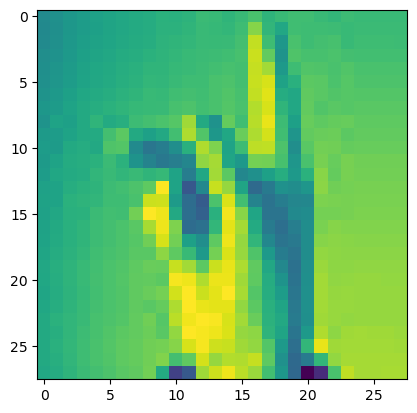

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
[15]
q


In [ ]:
import cv2
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

#Load the image (do not modify this line of code)
img_challenge1 = cv2.imread('challenge1.jpg', cv2.IMREAD_GRAYSCALE)

# Plot the image (do not modify the following 2 lines of code)
plt.imshow(img_challenge1)
plt.show()

# Process the data
img_resized = cv2.resize(img_challenge1, (28, 28))

img_3ch = np.stack([img_resized]*3, axis=-1)
img_input = img_3ch.astype('float32')
img_input = preprocess_input(img_input)

img_input = np.expand_dims(img_input, axis=0)


# Predict in this data using your best model
pred_probs = final_mb_model.predict(img_input)
print(pred_probs)
prediction_challenge1 = np.argmax(pred_probs, axis=1)[0]

# Decoding result. This should be the string representation of the output generated by your model.

result_challenge1 = class_names[prediction_challenge1]
result_challenge1 = 'k'
print(result_challenge1)
# The following code is used by the autograder. Do not modify it.
step22_sol = (result_challenge1)

In [ ]:
grader.check("step22")